In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dynamics import swimming
from matplotlib import ticker

In [3]:
gf = 5.5e-6
gb = 1.5*gf
gap_final = 1e-6
N = 40
epsilon_0 = 8.85e-12
epsilon = 80
L_overlap = 50e-6
thickness = 40e-6
C = epsilon_0*epsilon*N*L_overlap*thickness/gap_final

In [4]:
C

5.6640000000000024e-11

In [5]:
V = 8
f = 1e6
power = 1/2*C*V**2*f

In [6]:
power

0.0018124800000000009

In [7]:
shuttle = {
    'R': 500e-6,
    'height': 40e-6,
    'side_gap': 4e-6,
    'bottom_gap': 0.25e-6 
}
flagella = {
    'R': 500e-6,
    'lambda_R': 6.5,
    'L_R': 5,
    'a_R': 1/4
}
fluid = {
    'mu': 8.9e-4,
    'rho': 1000
}
substrate = {
    'L': 2e-3,
    'W': 2e-3,
    'H': 670e-6
}

In [8]:


Re = np.logspace(-4,1,50)

# radii = [100e-6,200e-6,300e-6,400e-6,500e-6]
radii = np.arange(100e-6, 500e-6, 20e-6)
viscosity = np.empty(( len(radii), Re.shape[0]))
results = np.empty( (*viscosity.shape, 6))
omegas = np.empty(viscosity.shape, dtype=np.ndarray)

2.303167662119106 8.722931458744448 88.97390087913645
2.303167662119106 8.722931458744448 88.97390087913644
2.303167662119106 8.722931458744451 88.97390087913647
2.3031676621191055 8.722931458744448 88.97390087913645
2.3031676621191055 8.722931458744448 88.97390087913645
2.303167662119106 8.722931458744448 88.97390087913645
2.303167662119106 8.72293145874445 88.97390087913645
2.303167662119106 8.722931458744448 88.97390087913645
2.303167662119106 8.722931458744448 88.97390087913644
2.303167662119106 8.722931458744448 88.97390087913644
2.303167662119106 8.722931458744448 88.97390087913645
2.303167662119106 8.722931458744448 88.97390087913645
2.3031676621191055 8.722931458744448 88.97390087913645
2.303167662119106 8.722931458744448 88.97390087913645
2.303167662119106 8.722931458744448 88.97390087913647
2.3031676621191055 8.722931458744446 88.97390087913644
2.303167662119106 8.72293145874445 88.97390087913645
2.303167662119106 8.722931458744448 88.97390087913645
2.3031676621191055 8.72293

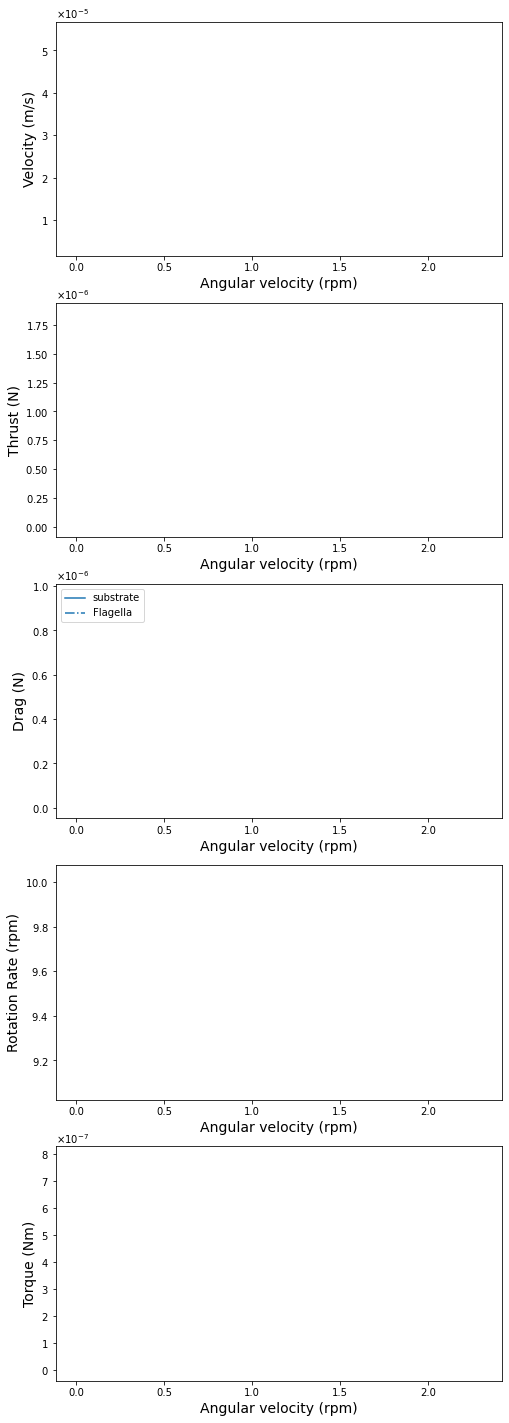

In [9]:
fig, ax = plt.subplots(5,1)
fig.set_size_inches(8,25)
for i, rad in enumerate(radii):
    for j,re in enumerate(Re):
        omega = 1
        flagella['R'] =rad
        shuttle['R'] = rad
        mu = fluid['rho'] *omega * rad**2/ re
        fluid['mu'] = mu

        dynamics = swimming.swimming_dynamics_ss_omega(omega, flagella, shuttle,substrate, fluid)
        viscosity[i,j] = mu
        results[i,j, :] = np.array(dynamics)
        omegas[i,j] = omega
        swimming.plot_swimming_dyanmics(dynamics, mu, fig, ax, xaxis = 'rpm')


In [10]:
Re.shape

(50,)

In [11]:
ind = {'torque' :0 ,'Omega':1, 'Thrust':2, 'vel': 3, 'substrate_drag': 4, 'flagellar_drag':5}

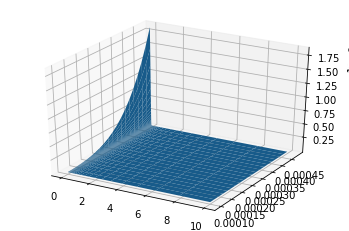

In [12]:
fig, ax = plt.subplots(2,1)
ax[0] = plt.axes(projection='3d')
Rex, radiiy = np.meshgrid(Re, radii)
ax[0].plot_surface(Rex, radiiy, results[:,:,2])
# ax[0].set_yscale('log')
# ax[0].set_ylabel()

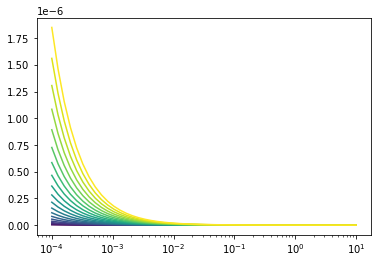

In [13]:
fig, ax = plt.subplots(1,1)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.viridis(np.linspace(0, 1, len(radii)))))
for i,rad in enumerate(radii):
    ax.plot(Re, results[i, :, 2])
    ax.set_xscale('log')


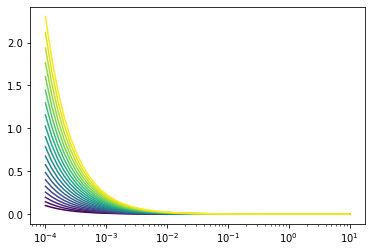

In [14]:
fig, ax = plt.subplots(1,1)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.viridis(np.linspace(0, 1, len(radii)))))
for i,rad in enumerate(radii):
    ax.plot(Re, viscosity[i,:])
    ax.set_xscale('log')


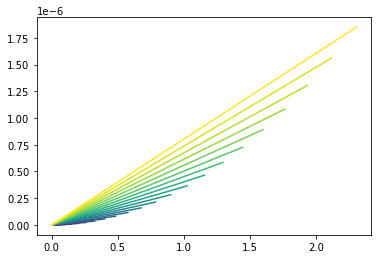

In [15]:
fig, ax = plt.subplots(1,1)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.viridis(np.linspace(0, 1, len(radii)))))
for i,rad in enumerate(radii):
    ax.plot(viscosity[i,:], results[i,:,2])
    # ax.set_xscale('log')


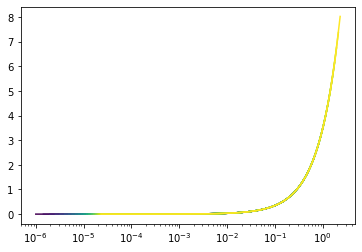

In [16]:
fig, ax = plt.subplots(1,1)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.viridis(np.linspace(0, 1, len(radii)))))
for i,rad in enumerate(radii):
    ax.plot(viscosity[i,:], results[i,:,2]/rad**2)
    ax.set_xscale('log')

In [17]:
from dynamics import motor_analysis

In [18]:
num_fingers = 200
finger_length = 40e-6
final_gap_front = 1e-6
final_gap_back = (7.60-4.07)*1e-6
thickness = 40e-6
epsilon_0 = 8.85e-12
epsilon_r=80
capacitance =epsilon_0*epsilon_r* num_fingers*finger_length*thickness*(1/final_gap_front+ 1/final_gap_back)

Text(0.5, 0, 'Frequency(Hz)')

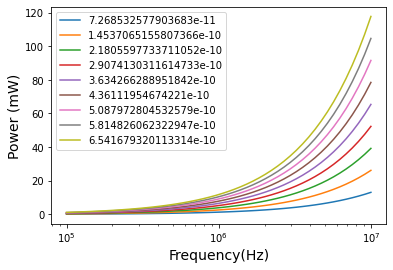

In [19]:
finger_length_s = np.arange(10e-6, 100e-6, 10e-6)
voltage = 6
frequency = np.logspace(5, 7, 50)
fig, ax = plt.subplots(1,1)
caps = []
for finger_length in finger_length_s:
    capacitance =epsilon_0*epsilon_r* num_fingers*finger_length*thickness*(1/final_gap_front+ 1/final_gap_back)
    caps.append(capacitance)
    power =0.5*voltage**2 * capacitance * frequency
    ax.plot(frequency, power*1e3)
    ax.set_xscale('log')
plt.legend(caps)
ax.set_ylabel('Power (mW)', fontsize = 14)
ax.set_xlabel('Frequency(Hz)', fontsize = 14)

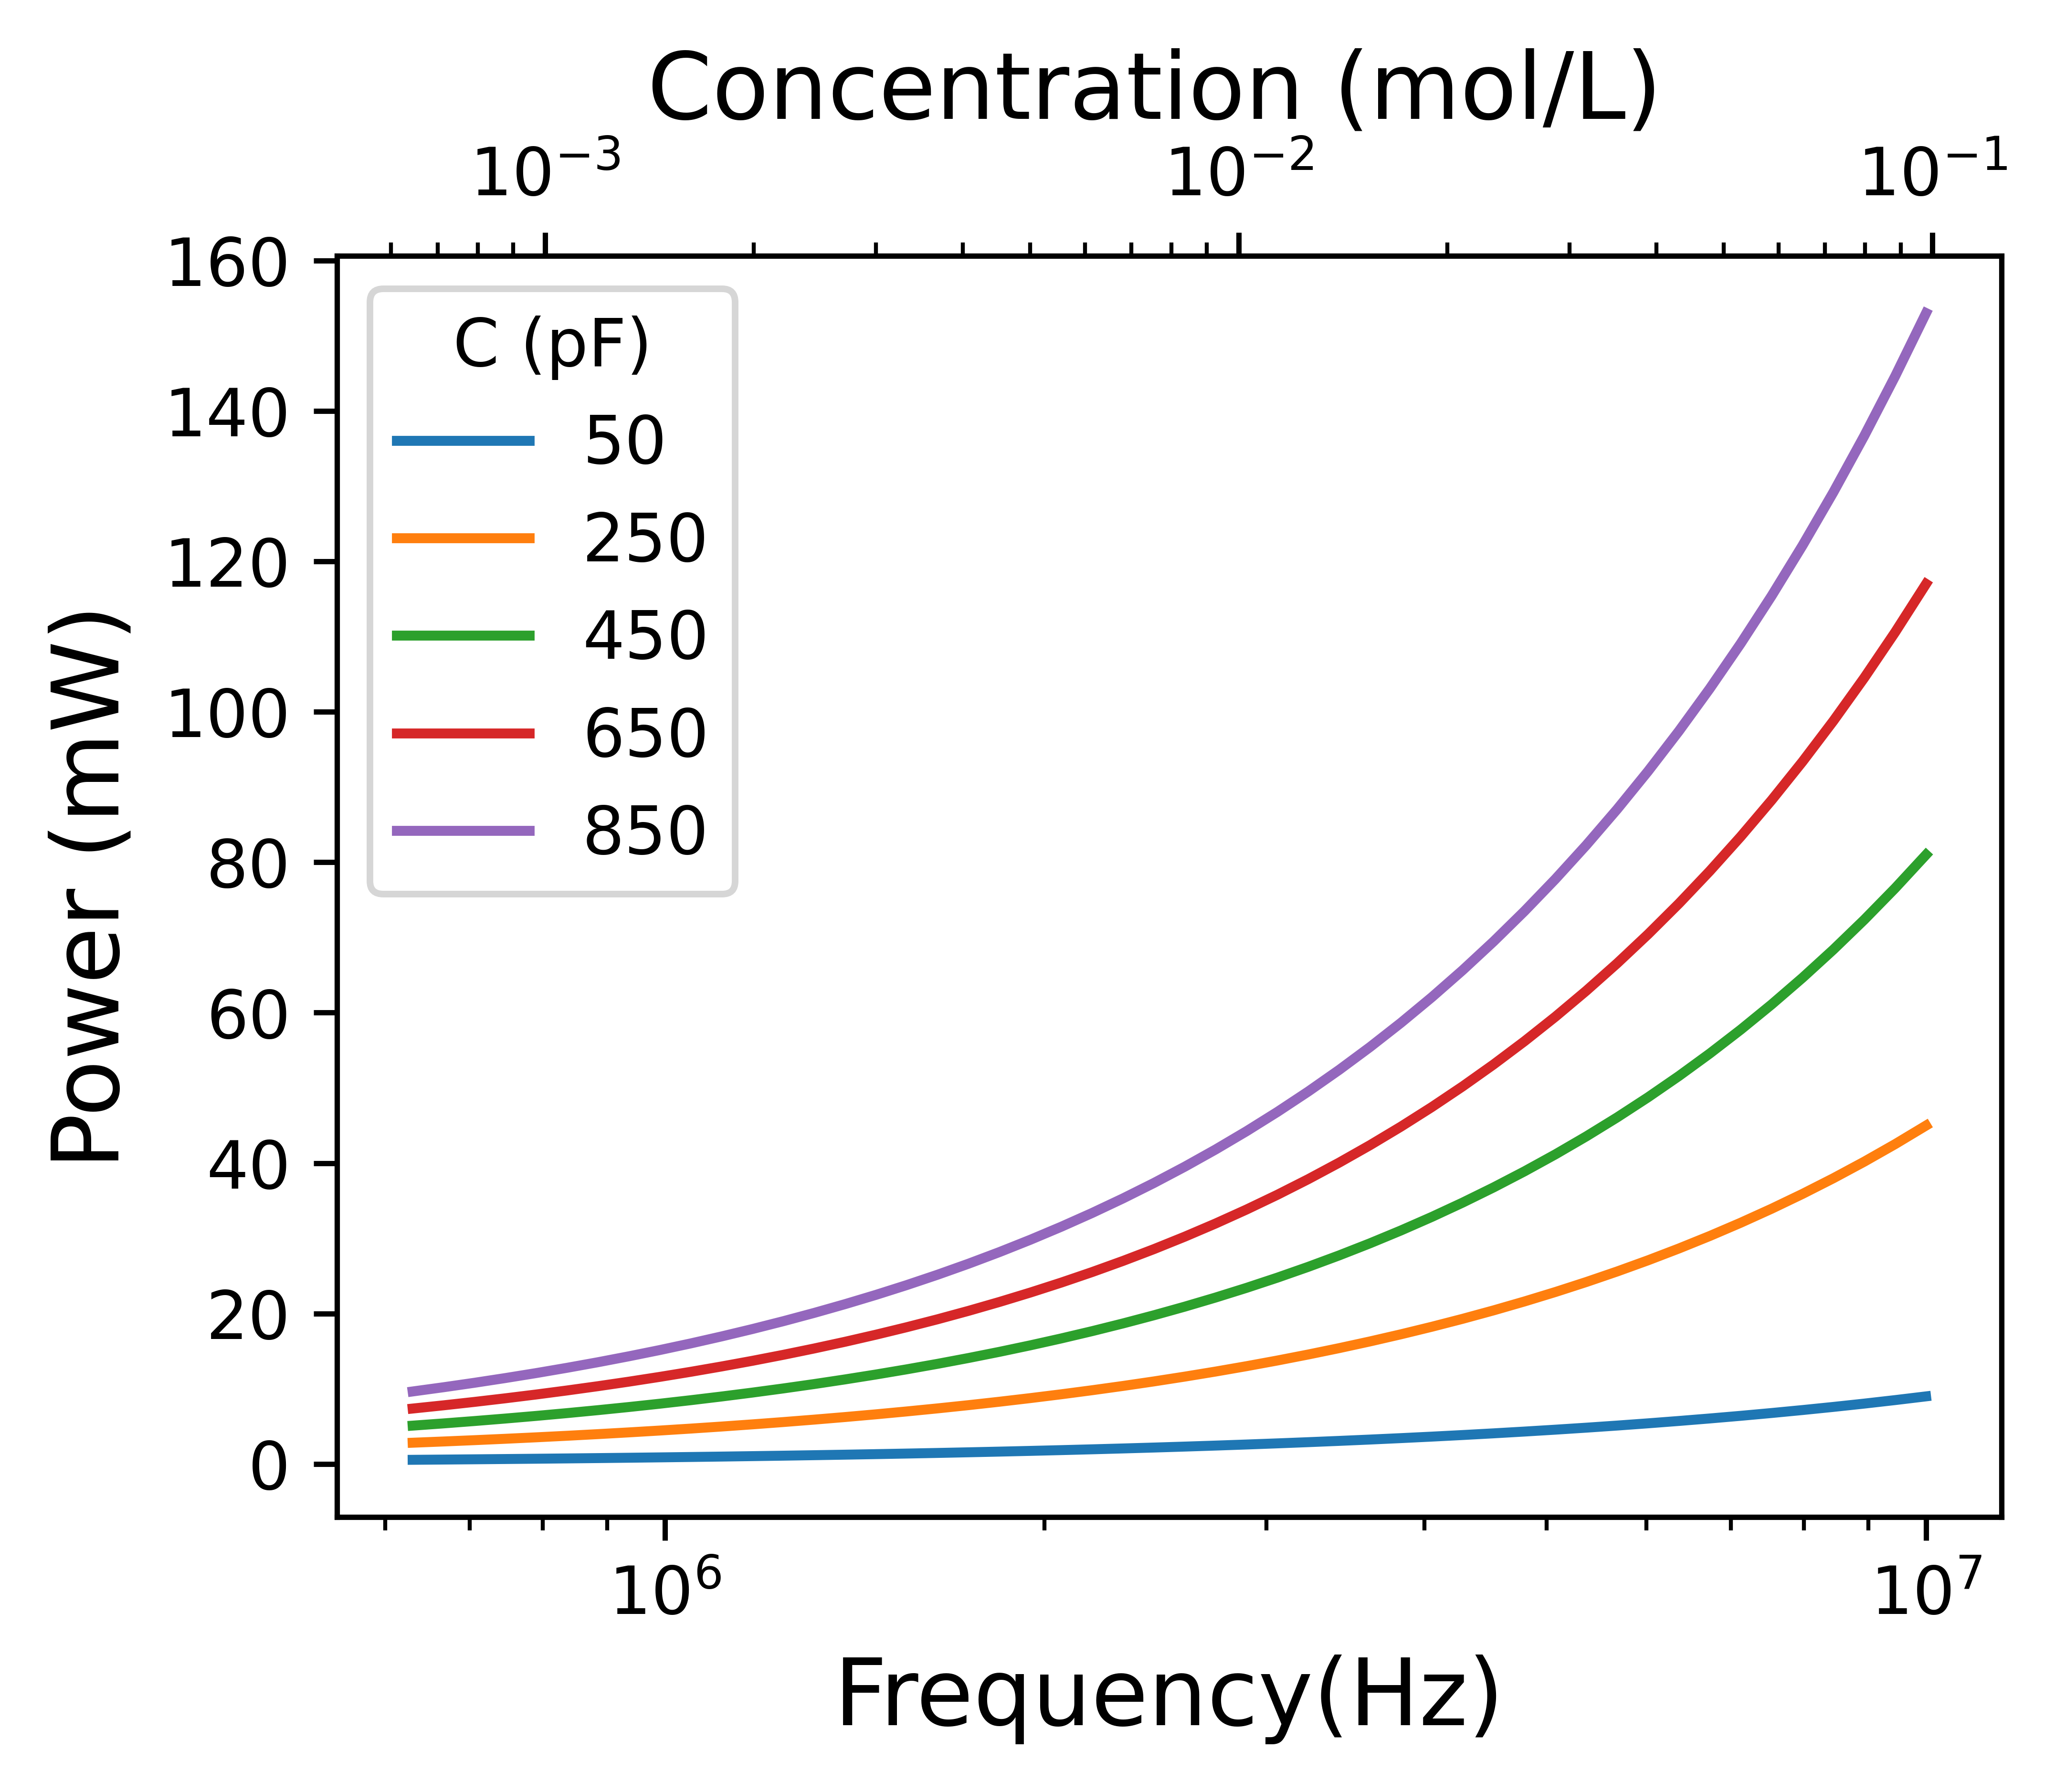

In [20]:
# finger_length_s = np.arange(10e-6, 100e-6, 10e-6)
voltage = 6
frequency = np.logspace(5.8, 7, 50)
fig, ax = plt.subplots(1,1)
caps = np.arange(50e-12, 1e-9, 200e-12)
for capacitance in caps:
    # capacitance =epsilon_0*epsilon_r* num_fingers*finger_length*thickness*(1/final_gap_front+ 1/final_gap_back)
    # caps.append(capacitance)
    power =0.5*voltage**2 * capacitance * frequency
    ax.plot(frequency, power*1e3)
    ax.set_xscale('log')
plt.legend([f'{c*1e12:.0f}'for c in caps], title = 'C (pF)')
ax.set_ylabel('Power (mW)', fontsize = 14)
ax.set_xlabel('Frequency(Hz)', fontsize = 14)
ax2 = ax.twiny()
ax2.set_xlim((10**(-3.3), 10**(-0.9)))
ax2.set_xscale('log')
ax2.set_xlabel('Concentration (mol/L) ', fontsize=14)
fig.set_size_inches(4.5,3.5)
fig.set_dpi(1000)
fig.savefig('quals/power_consumption.png', bbox_inches='tight')

In [21]:
shuttle = {
    'R': 500e-6,
    'height': 40e-6,
    'side_gap': 4e-6,
    'bottom_gap': 0.25e-6 
}
flagella = {
    'R': 500e-6,
    'lambda_R': 6.5,
    'L_R': 7,
    'a_R': 1/7
}
fluid = {
    'mu': 8.9e-4,
    'rho': 1000
}
substrate = {
    'L': 1.5e-3,
    'W': 1.5e-3,
    'H': 670e-6
}

In [22]:
from dynamics import swimming

444.99999999999994
2.815719122470987 8.677167935498717 88.5071129420303
444.99999999999994
2.8157191224709877 8.67716793549872 88.5071129420303
444.99999999999994
2.815719122470987 8.677167935498717 88.50711294203029


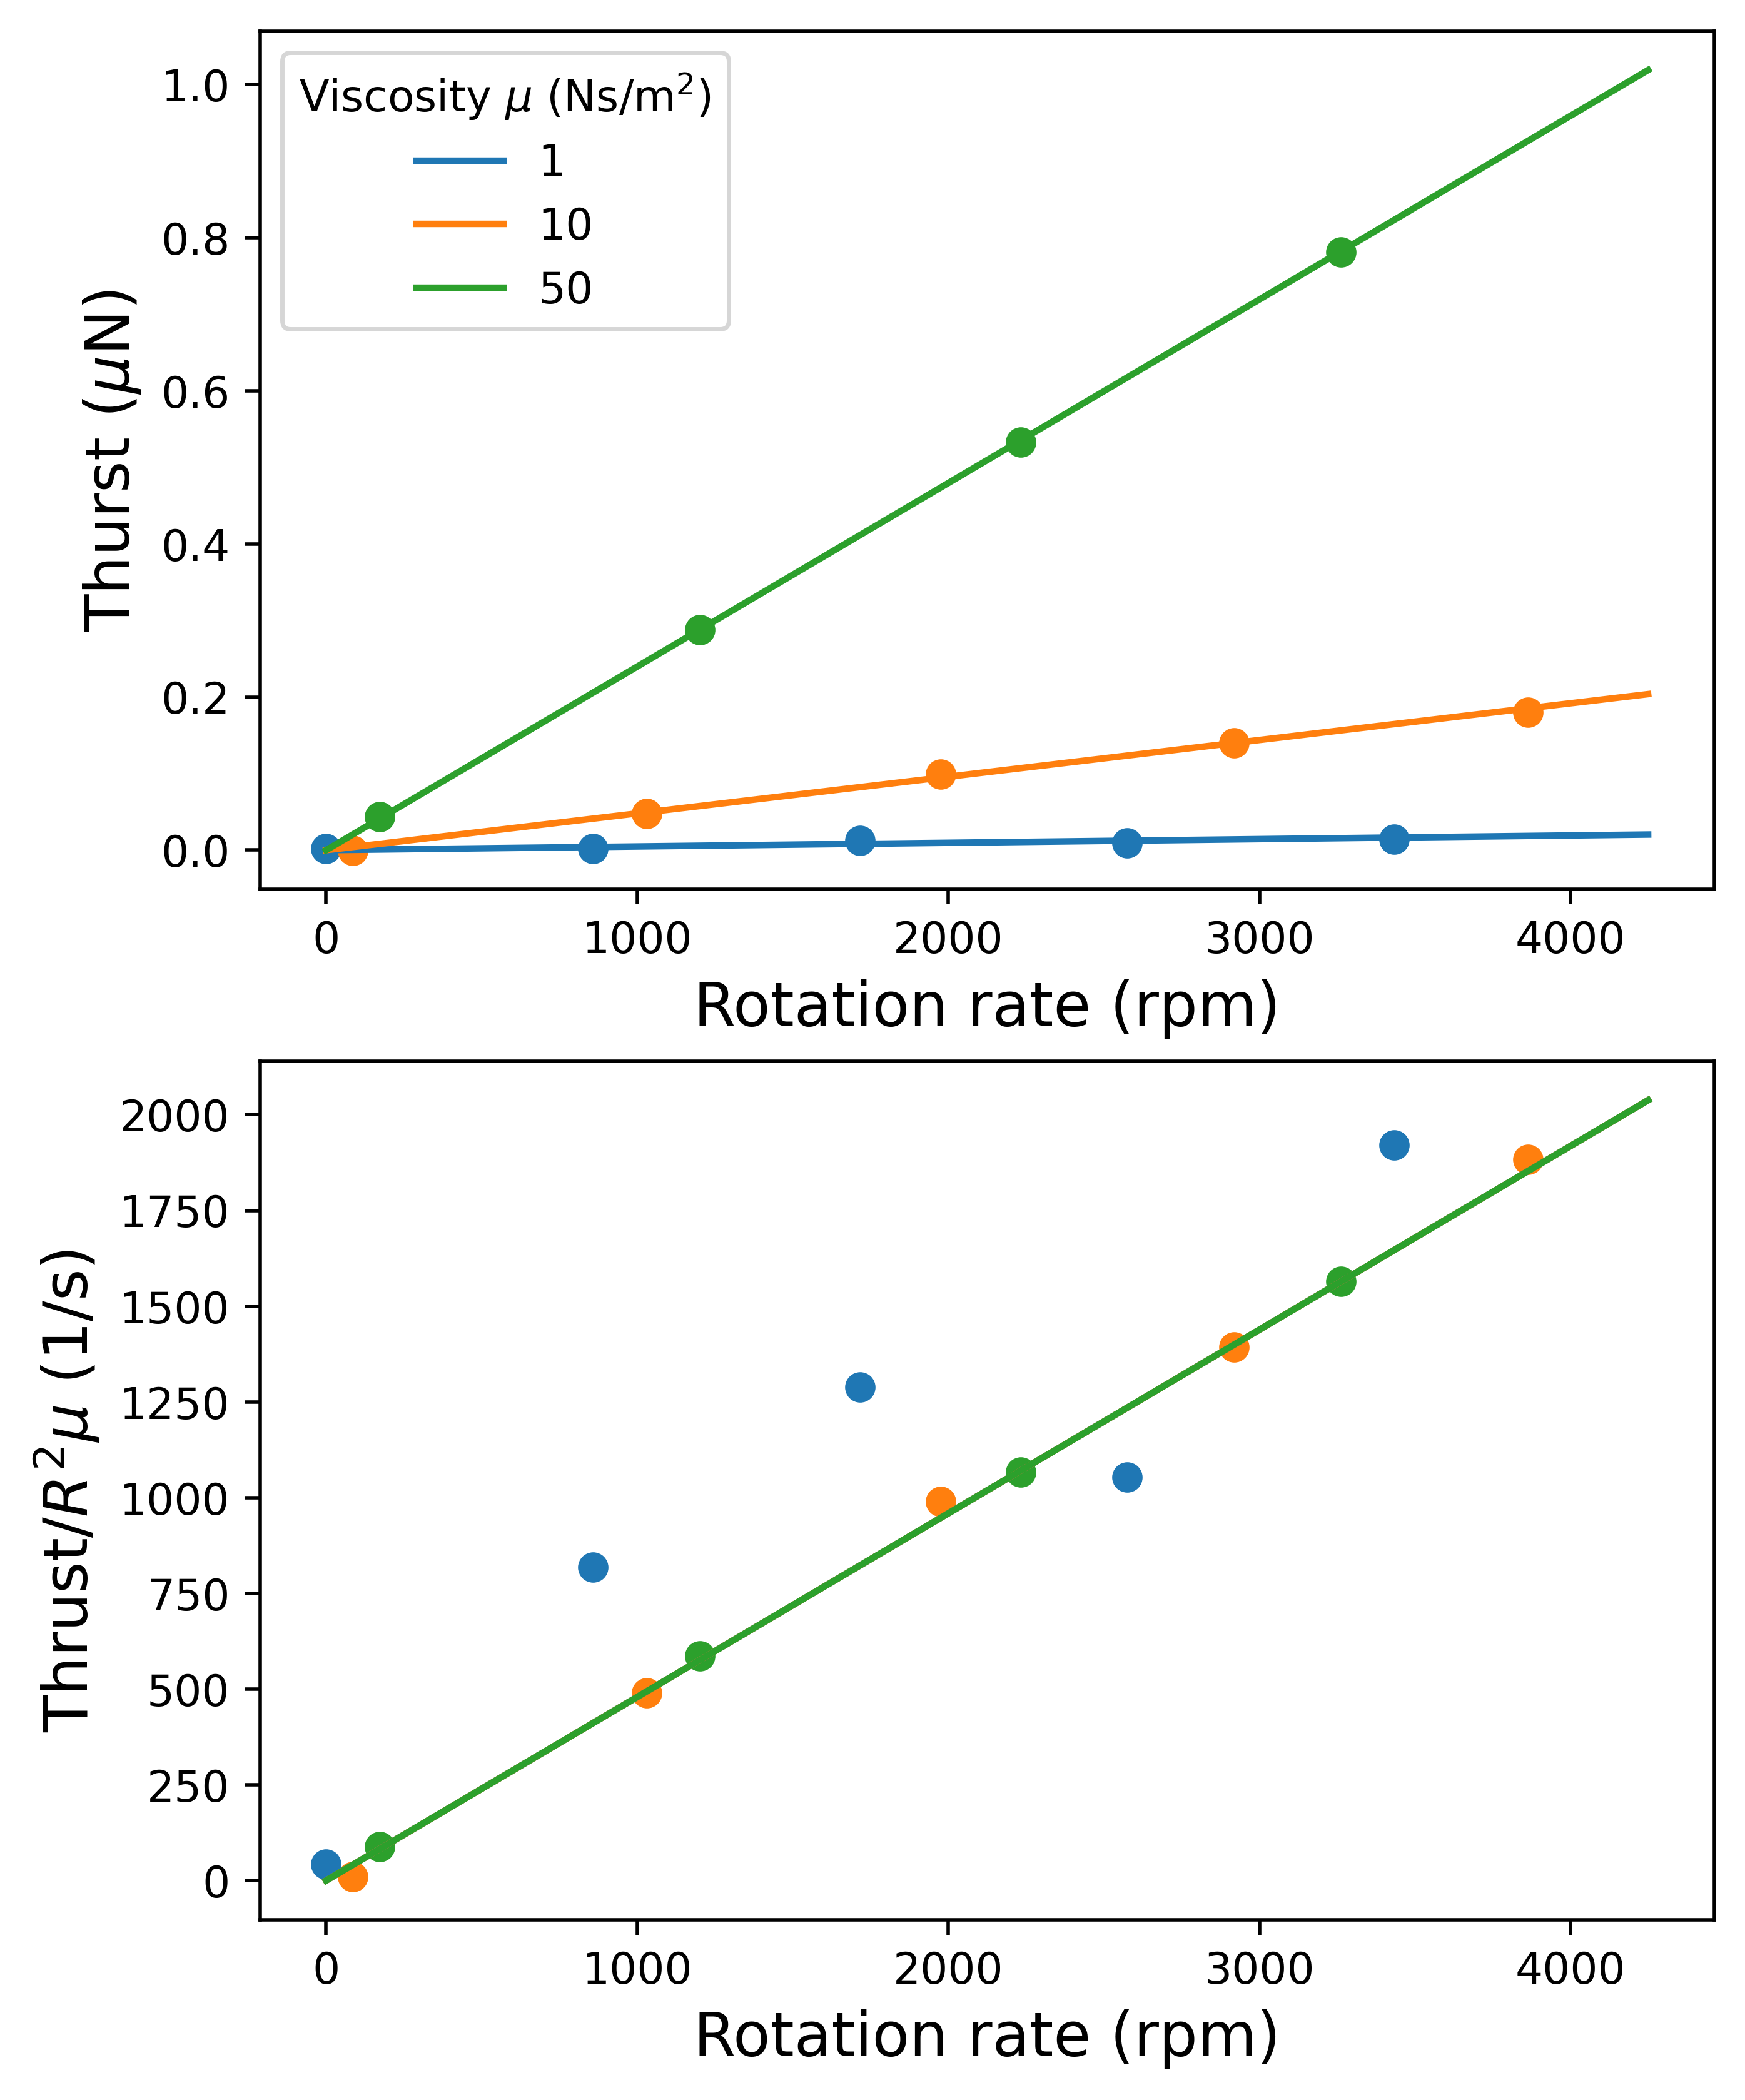

In [187]:
Re_max = 5
radii = [100e-6]
fig, axs = plt.subplots(2,1)
fig.set_size_inches(6,4)
mu = [1e-3, 1e-2, 5e-2]
dynamics_all = np.empty((len(mu), len(radii)), dtype = list)
omegas = []
for j, mut in enumerate(mu):
    for i, rad in enumerate(radii):
        omega_max = 8.9e-4*Re_max/(1000*rad**2)
        print(omega_max)
        omega = np.linspace(0,omega_max, 100)
        omegas.append(omega)
        flagella['R'] = rad
        shuttle['R'] = rad
        fluid['mu'] = mut
        dynamics = swimming.swimming_dynamics_ss_omega(omega, flagella, shuttle,substrate, fluid)
        axs[0].plot(dynamics[1]*60/(2*np.pi), dynamics[2]*1e6)
        axs[1].plot(dynamics[1]*60/(2*np.pi), dynamics[2]/(rad**2 *mut))
        omega_samp = dynamics[1][2*j::20+2*j]*60/(2*np.pi)

        thrust_pts = dynamics[2][2*j::20+2*j]+1e-8* (np.random.rand(*omega_samp.shape)-0.5)
        reg_pts = (dynamics[2][2*j::20+2*j]+1e-8* (np.random.rand(*omega_samp.shape)-0.5))/((rad**2 *mut))
        axs[0].scatter(omega_samp, thrust_pts*1e6)
        axs[1].scatter(omega_samp, reg_pts)
fig.set_size_inches(6,8)
ax = axs
ax[0].set_xlabel(r'Rotation rate (rpm)', fontsize = 14)
ax[1].set_xlabel(r'Rotation rate (rpm)', fontsize = 14)
ax[0].set_ylabel(r'Thurst ($\mu$N)', fontsize = 14)
ax[1].set_ylabel(r'Thrust/$R^2\mu$ (1/s)', fontsize = 14)

ax[0].legend([f'{mut*1e3:.0f}' for mut in mu], title = r'Viscosity $\mu$ (Ns/m$^2$)')
fig.set_dpi(500)
fig.savefig('quals/flag_fake.png', bbox_inches='tight')

In [172]:
omega_samp, thrust_pts

(array([ 171.69442346,  772.62490556, 1373.55538765, 1974.48586975,
        2575.41635185, 3176.34683395, 3777.27731605]),
 array([7.33167728e-09, 3.48779569e-08, 6.39201174e-08, 9.41174273e-08,
        1.23965230e-07, 1.55581159e-07, 1.84499140e-07]))

In [25]:
from dynamics import motor_analysis

In [118]:
params = {'L_sup':10e-6, 'L_frame': 10e-6, 'L_anchor': 50e-6, 'epsilon': 80, 'max_voltage':8, 'rho_medium': 1000, 'mu_medium': 1e-3,'epsilon': 80, 'gap_final': 1e-6, 'thickness': 40e-6 }
angle = 75
L_overlap = 10e-6
ms = motor_analysis.InchwormSpeed(2e-6, angle, 2e-6, L_overlap=L_overlap, **params)
ms.comp_period()


0.000314

In [139]:
volts = np.arange(4, 8, 1)
L_overlaps = np.arange(20e-6, 100e-6, 1e-6)
frequency = np.empty((len(volts), len(L_overlaps)))
force = np.empty(frequency.shape)
angle = 80
for i, v in enumerate(volts):
    params['max_voltage'] = v
    for j, L_overlap in enumerate(L_overlaps):
        ms = motor_analysis.InchwormSpeed(2e-6, angle, 2e-6,None,  L_overlap=L_overlap, **params)
        period = ms.comp_period()
        if period is None:
            frequency[i,j] = None
        elif period<=1e-9:
            frequency[i,j] = 0
        else:
            frequency[i,j] = 1/period
        force[i,j] = ms.force_load
    # ax[0].plot(L_overlaps*1e6, frequency[i,:]*1e-3)
    # ax[1].plot(L_overlaps*1e6, force[i,:]*1e6)


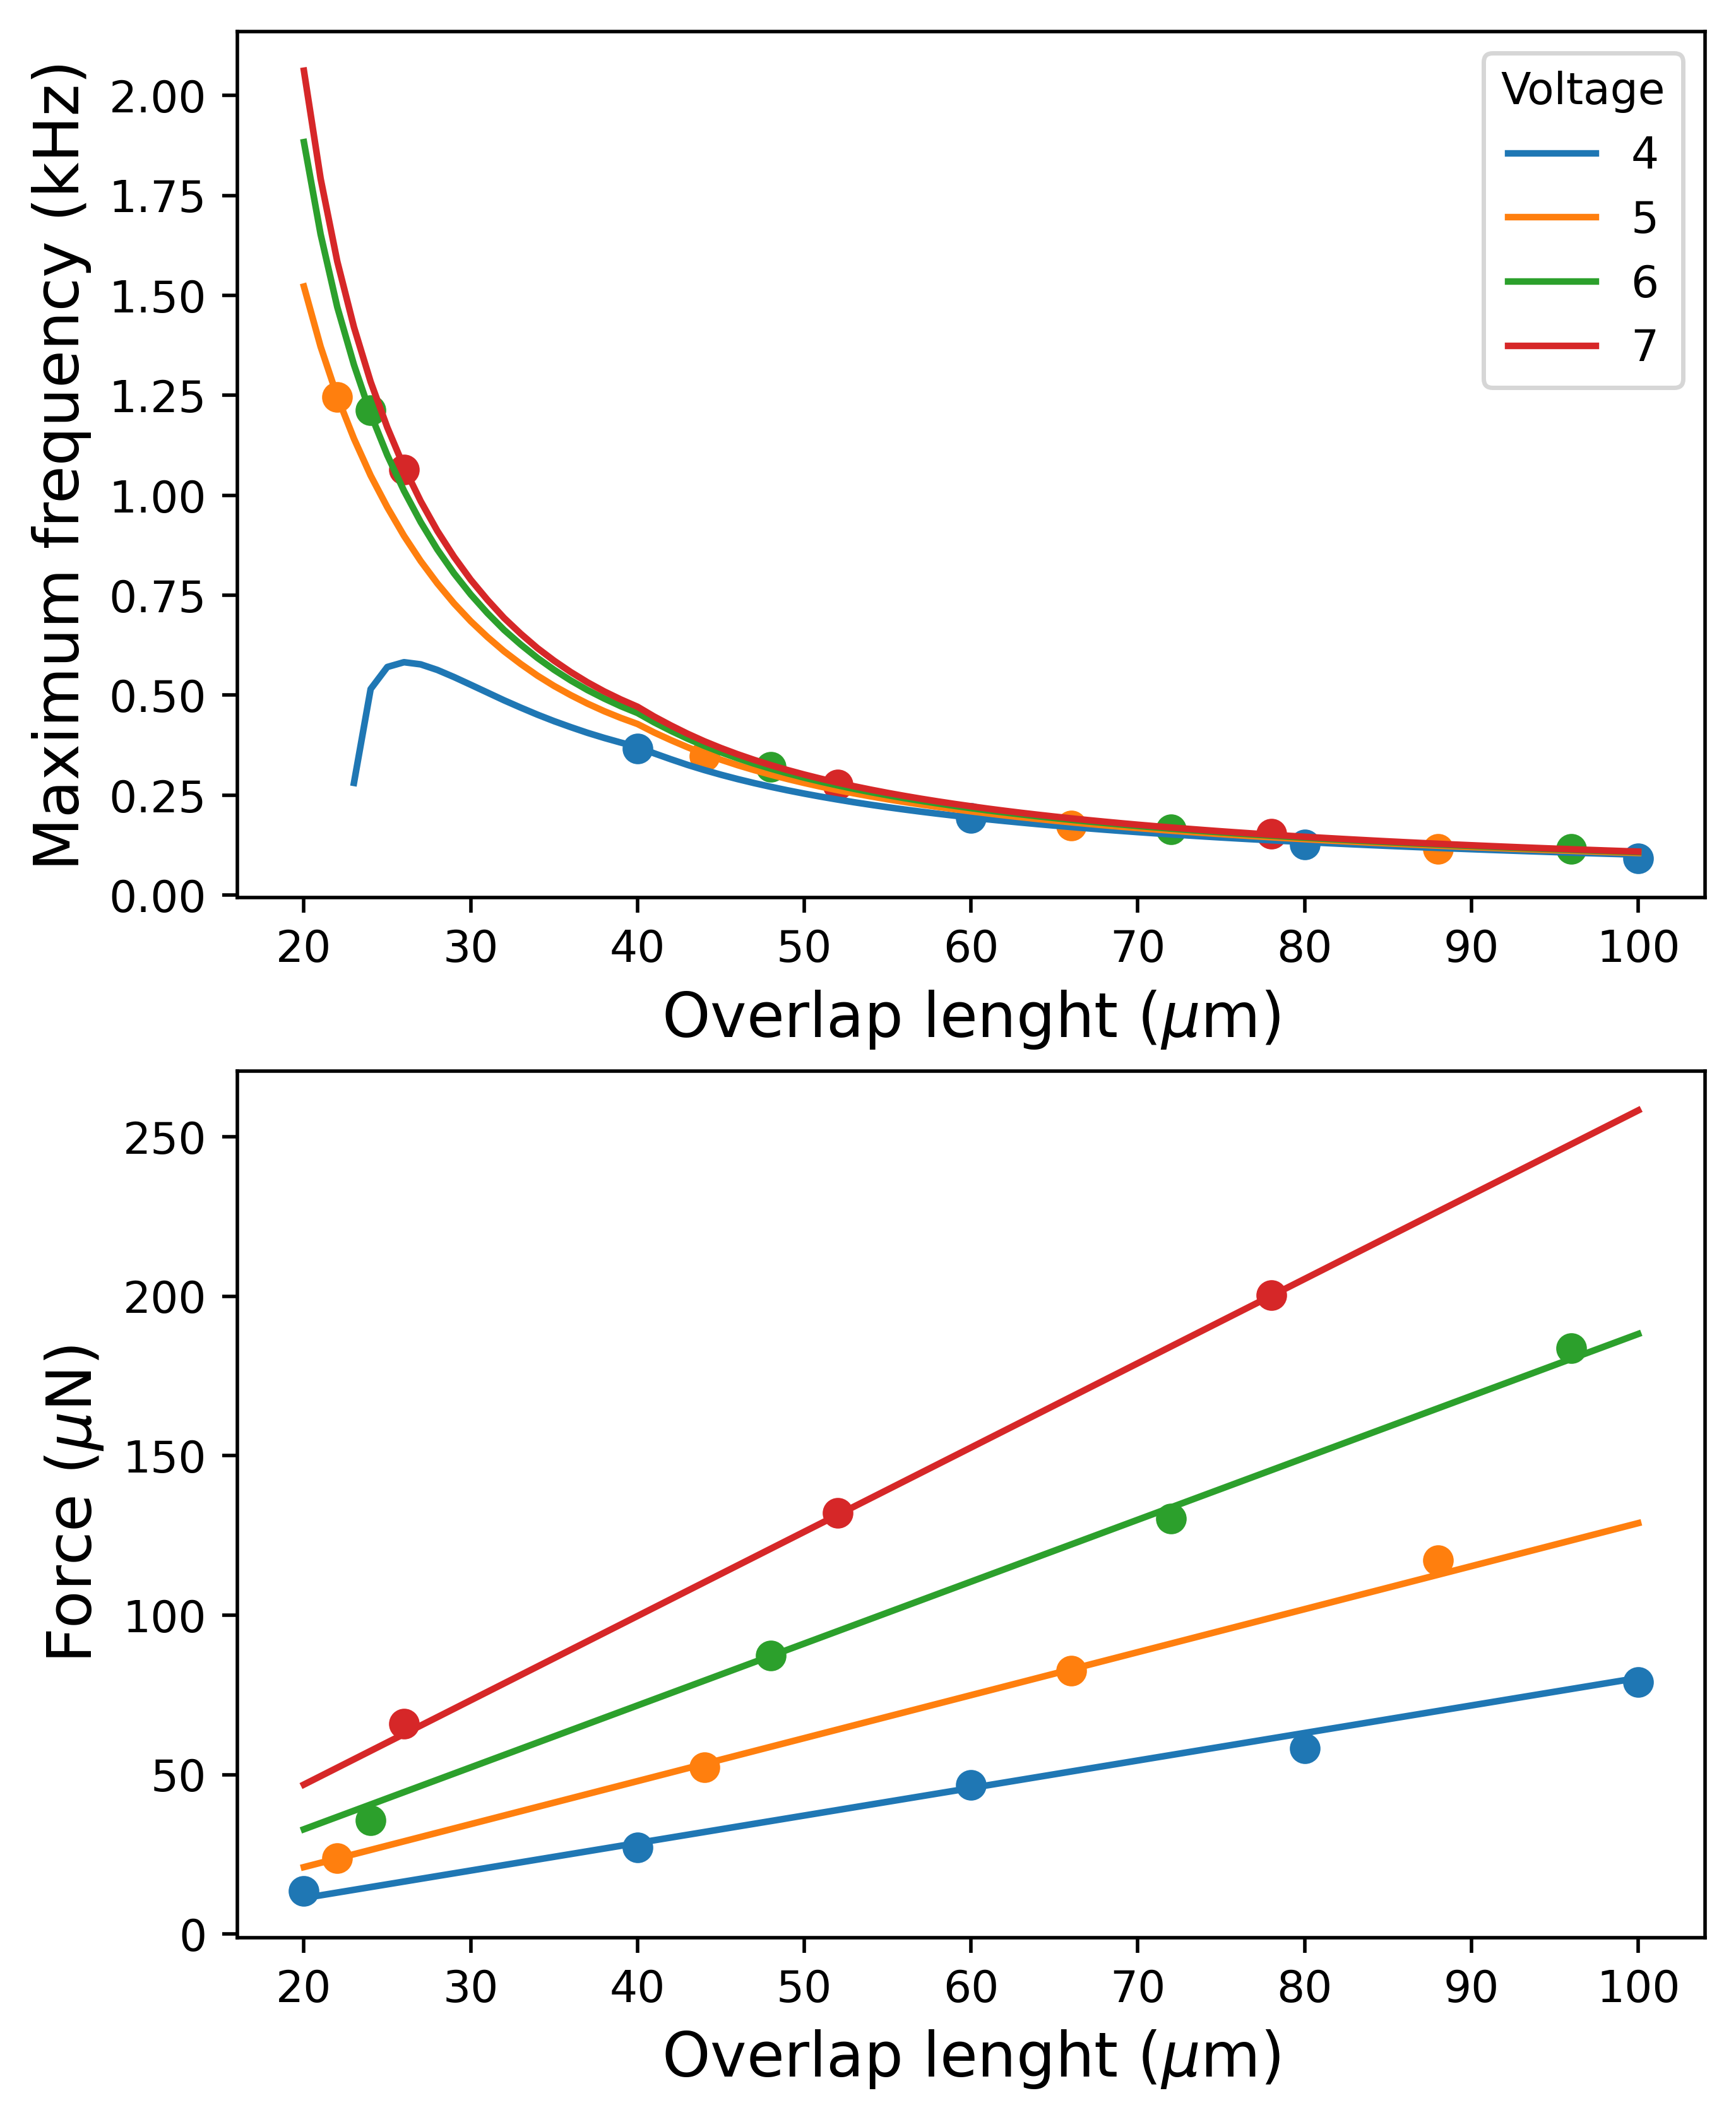

In [186]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(6,8)
ax[0].set_xlabel(r'Overlap lenght ($\mu$m)', fontsize = 14)
ax[1].set_xlabel(r'Overlap lenght ($\mu$m)', fontsize = 14)
ax[0].set_ylabel(r'Maximum frequency (kHz)', fontsize = 14)
ax[1].set_ylabel(r'Force ($\mu$N)', fontsize = 14)
for i, v in enumerate(volts):
    ax[0].plot(L_overlaps*1e6, frequency[i,:]*1e-3)
    ax[1].plot(L_overlaps*1e6, force[i,:]*1e6)
    L_overlaps_samp = L_overlaps[2*i::20+2*i]
    freq_pts = frequency[i, 2*i::20+2*i]+20* (np.random.rand(*L_overlaps_samp.shape)-0.5)
    force_pts = force[i, 2*i::20+2*i]+10e-6* (np.random.rand(*L_overlaps_samp.shape)-0.5)
    ax[0].scatter(L_overlaps_samp*1e6, freq_pts*1e-3)
    ax[1].scatter(L_overlaps_samp*1e6, force_pts*1e6)
fig.set_dpi(500)

ax[0].legend(volts, title = 'Voltage')
fig.savefig('quals/motor_fake.png', bbox_inches='tight')

In [101]:
np.max(frequency)

5.807716583221203e+279

In [83]:
np.argwhere(frequency<0)

<ipython-input-83-2a43e8cb7d94>:1: RuntimeWarning: invalid value encountered in less
  np.argwhere(frequency<0)


array([[0, 8]], dtype=int64)

In [84]:
frequency[0,8]

-3.1540525545407275e+304